<h1>TASK 3</h1>

<h2>Importing libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
url = 'https://github.com/Seetha-2002/PRODIGY_DS_03/raw/main/bank_data.csv'
data= pd.read_csv(url)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41188 non-null  int64  
 1   job                 41188 non-null  object 
 2   marital             41188 non-null  object 
 3   education           41188 non-null  object 
 4   default             41188 non-null  object 
 5   housing             41188 non-null  object 
 6   loan                41188 non-null  object 
 7   contact             41188 non-null  object 
 8   month               41188 non-null  object 
 9   day_of_week         41188 non-null  object 
 10  duration            41188 non-null  int64  
 11  campaign            41188 non-null  int64  
 12  pdays               41188 non-null  int64  
 13  previous            41188 non-null  int64  
 14  poutcome            41188 non-null  object 
 15  emp.var.rate        41188 non-null  float64
 16  cons

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
#checking for null values
data.isnull().sum().sum()

0

In [6]:
#checking duplicates
data.duplicated().sum()

12

In [7]:
#dropping null
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [9]:
#handling categorical variables
cat_col=data.select_dtypes(include=['object']).columns
data1=data[cat_col]
data1

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed_deposit
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [10]:
#encoding the variables(categorical)

en=OneHotEncoder(drop='first',sparse_output=False)
en_data=en.fit_transform(data1)
le=LabelEncoder()
data_encoded = data1.apply(le.fit_transform)
en_data

array([[0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

<h3>Visualization of data </h3>

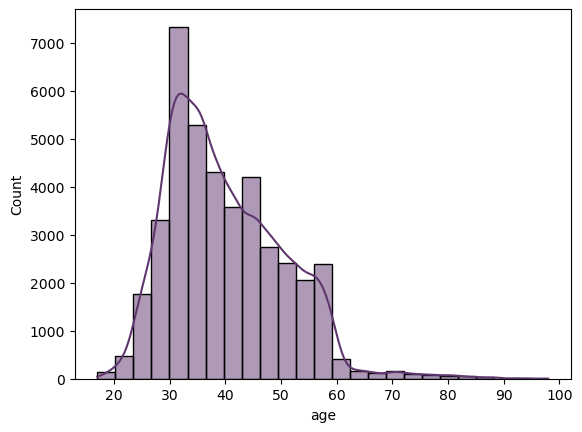

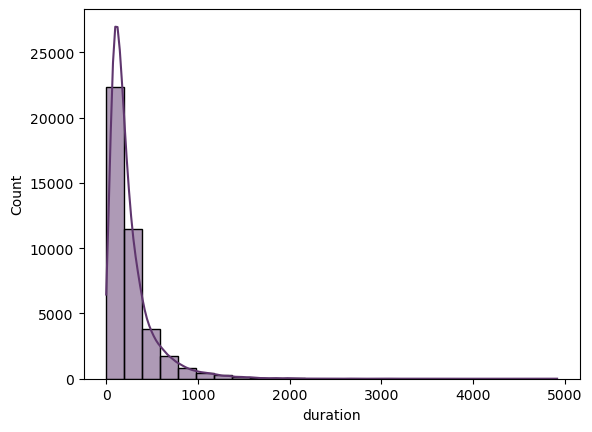

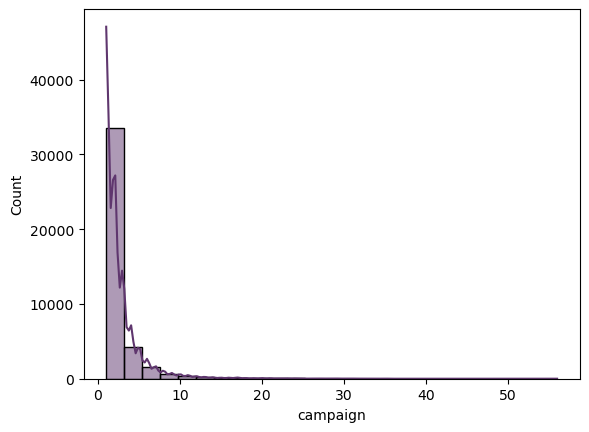

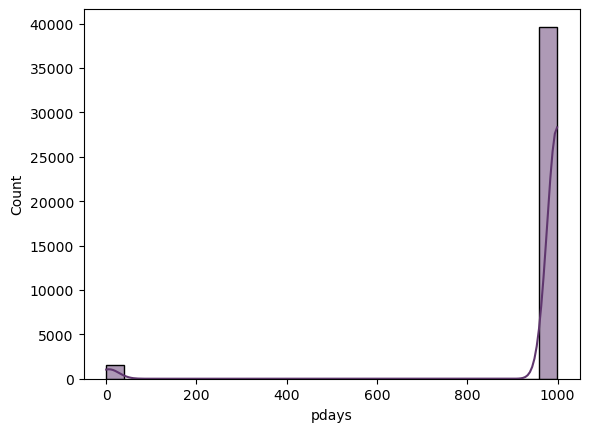

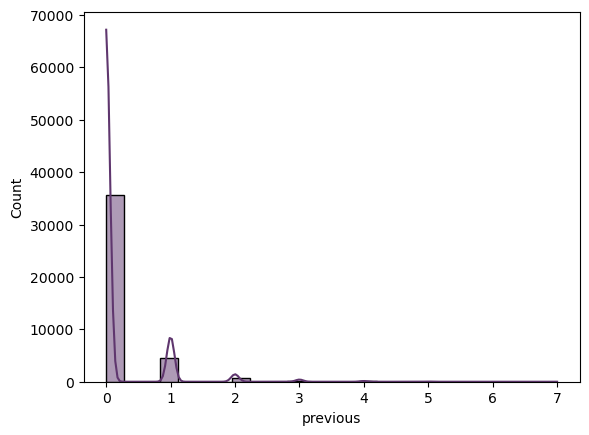

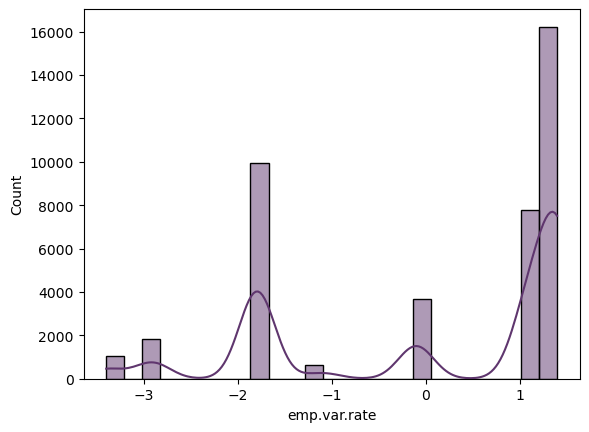

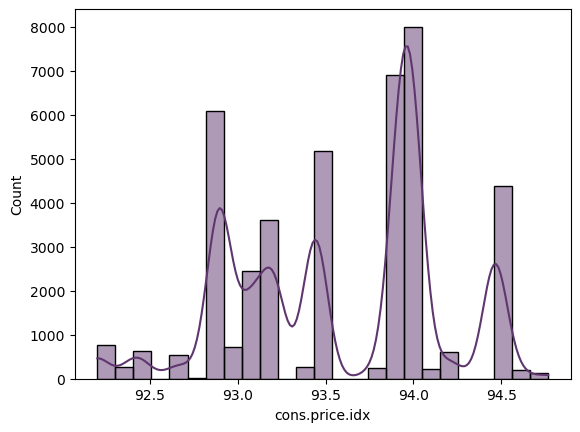

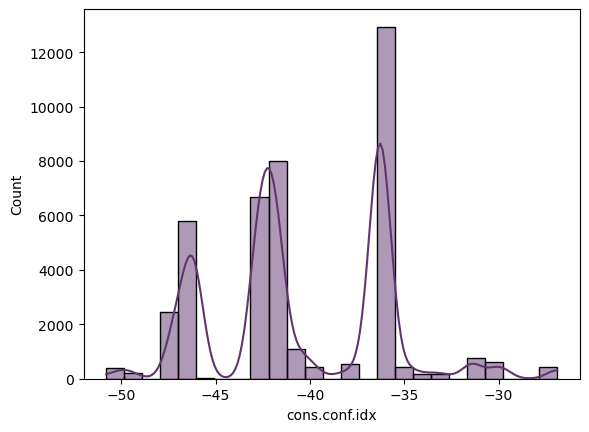

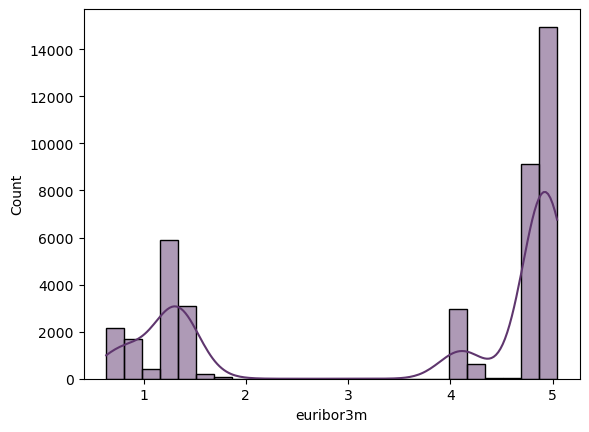

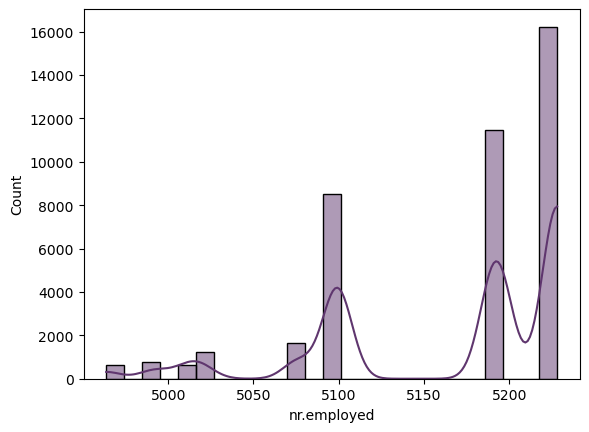

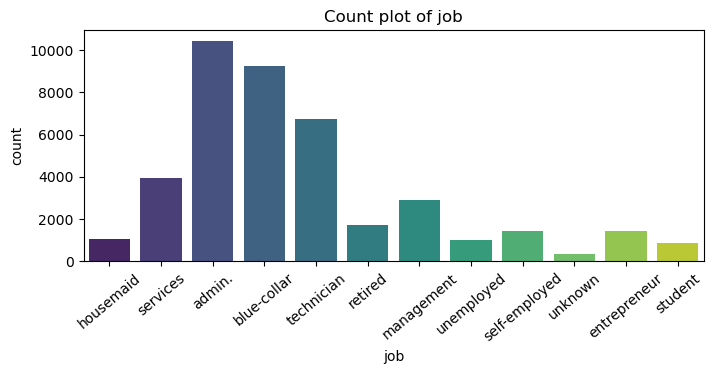

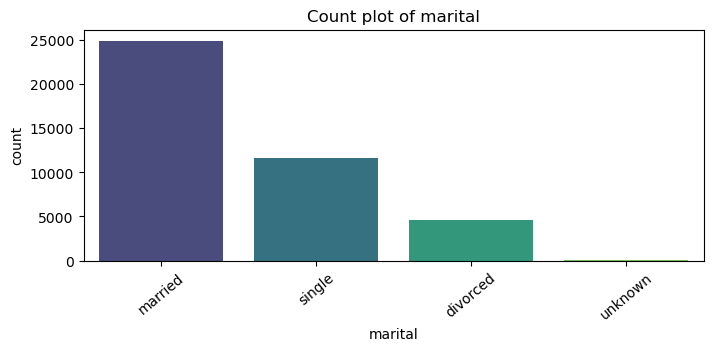

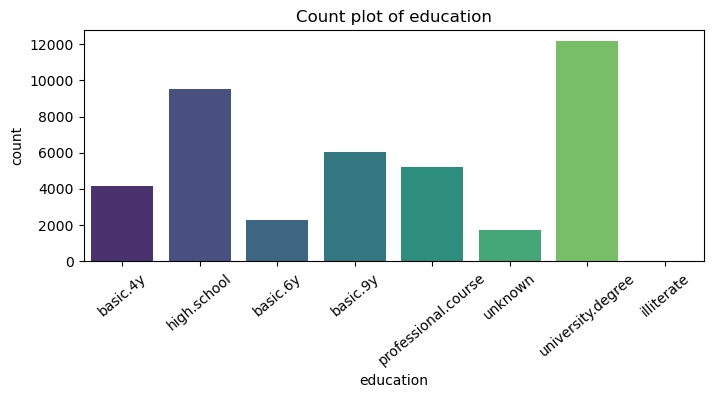

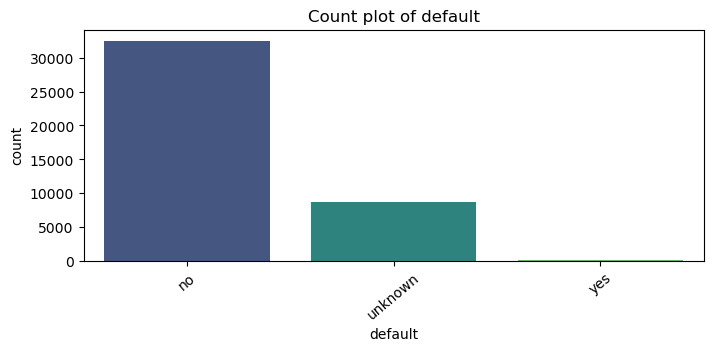

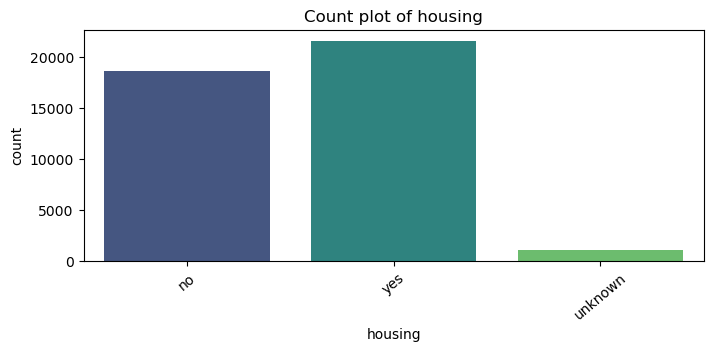

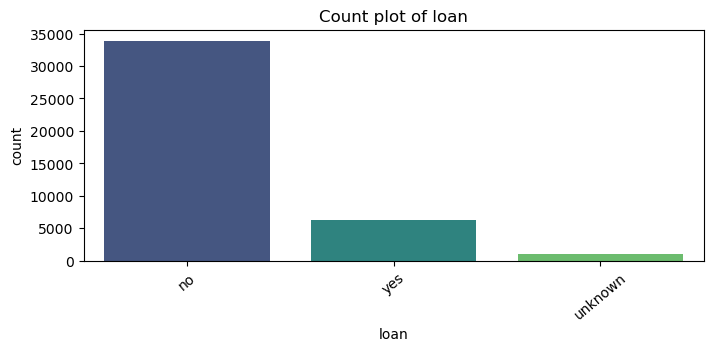

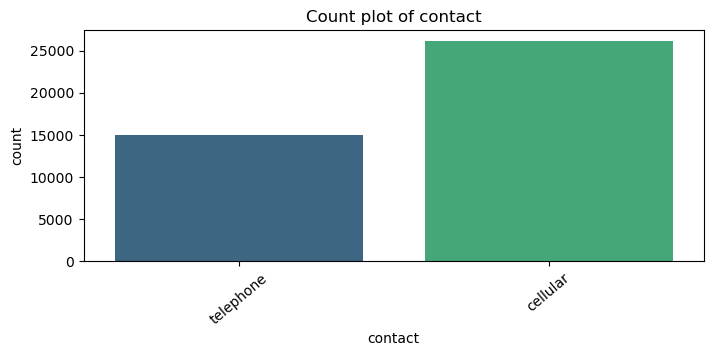

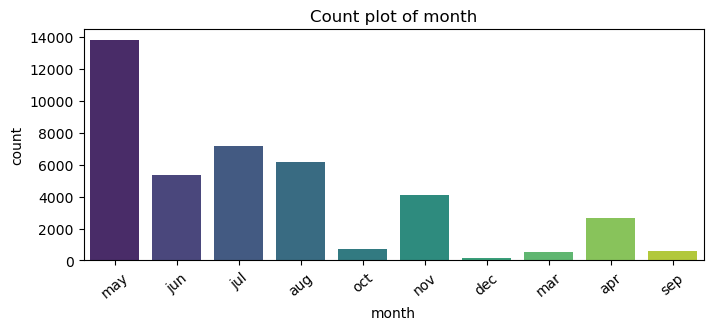

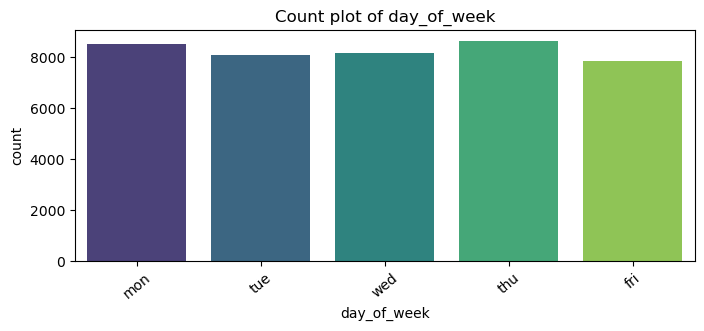

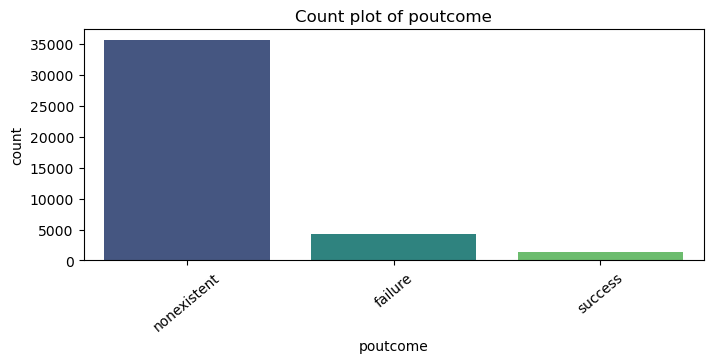

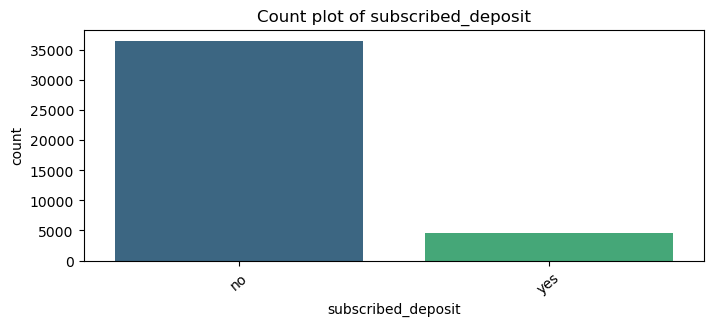

In [11]:
data_obj= data.select_dtypes(include='object').columns
data_num= data.select_dtypes(exclude='object').columns

for feature in data_num:
    sns.histplot(x=feature,data=data,bins=25,kde=True,color='#5f366e')
    plt.show()
for feature in data_obj:
    plt.figure(figsize=(8,3))
    plt.title(f"Count plot of {feature}")
    sns.countplot(x=feature,data=data,palette='viridis')
    plt.xticks(rotation=40)
    plt.show()

<h3>outlier detection</h3>

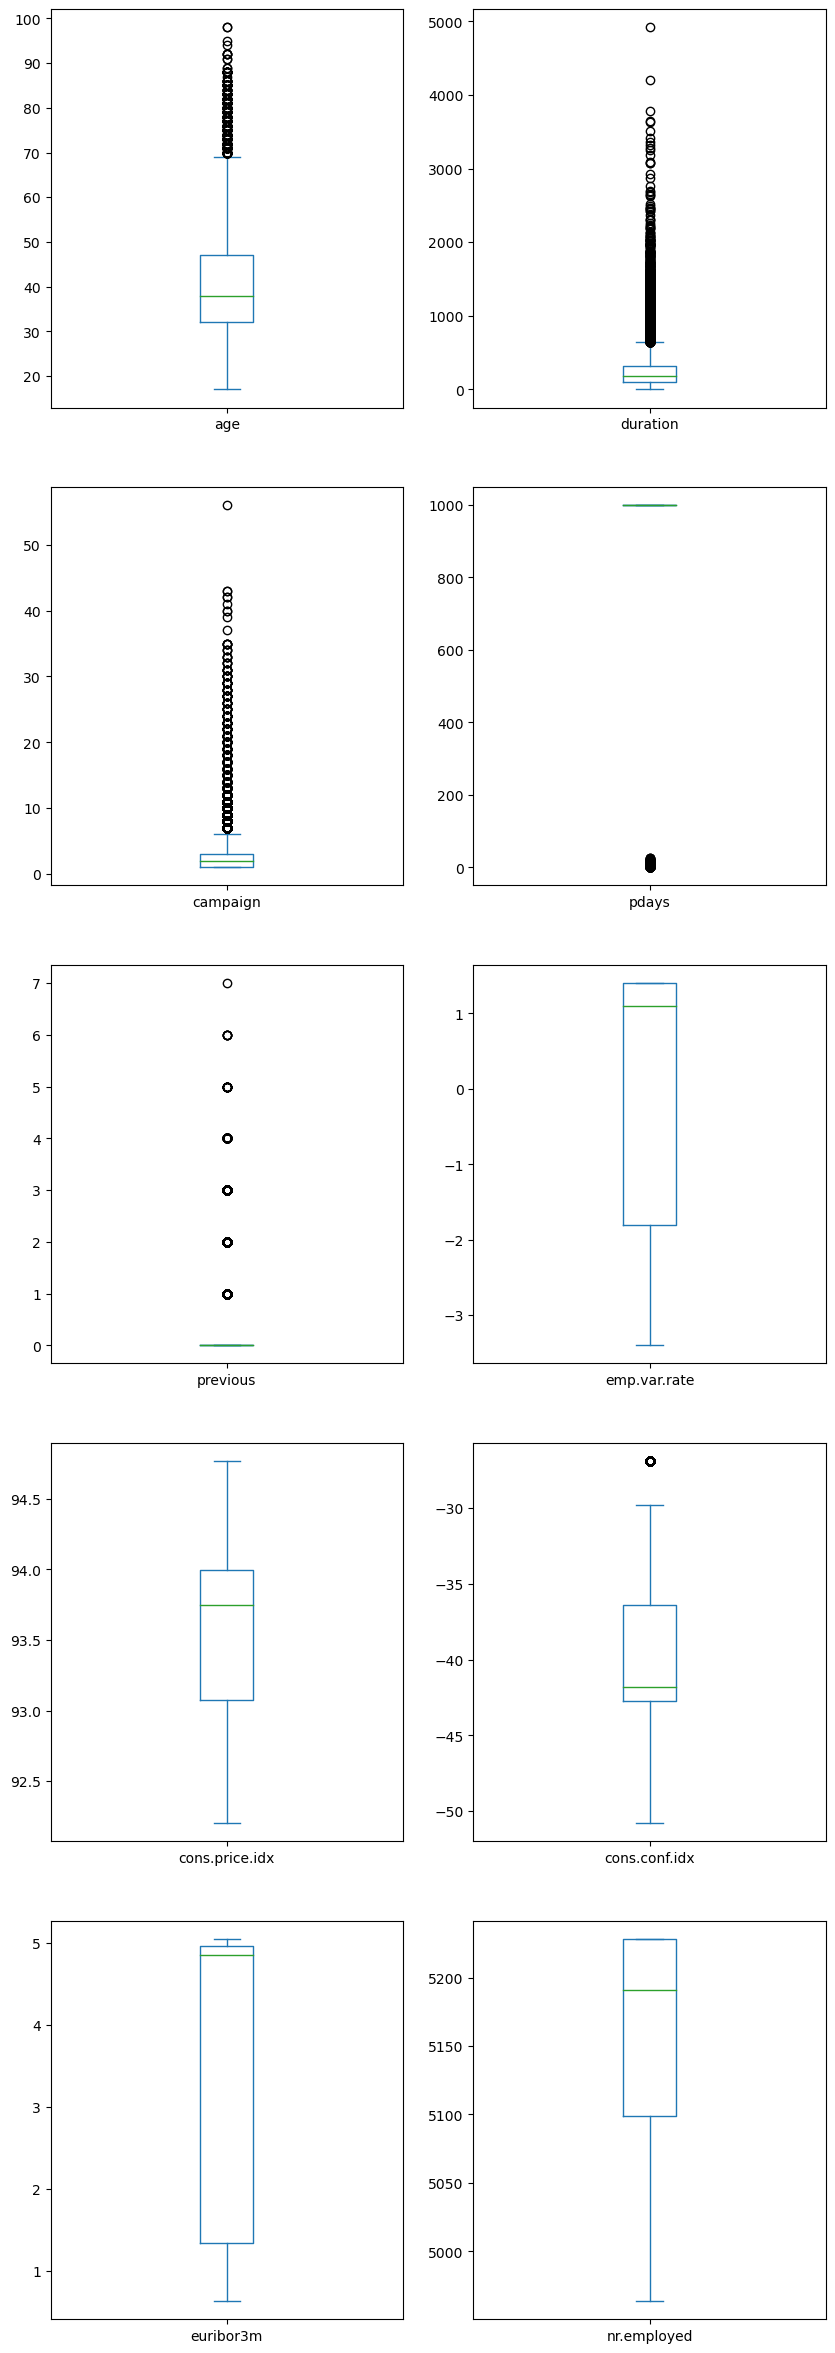

In [12]:
data.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

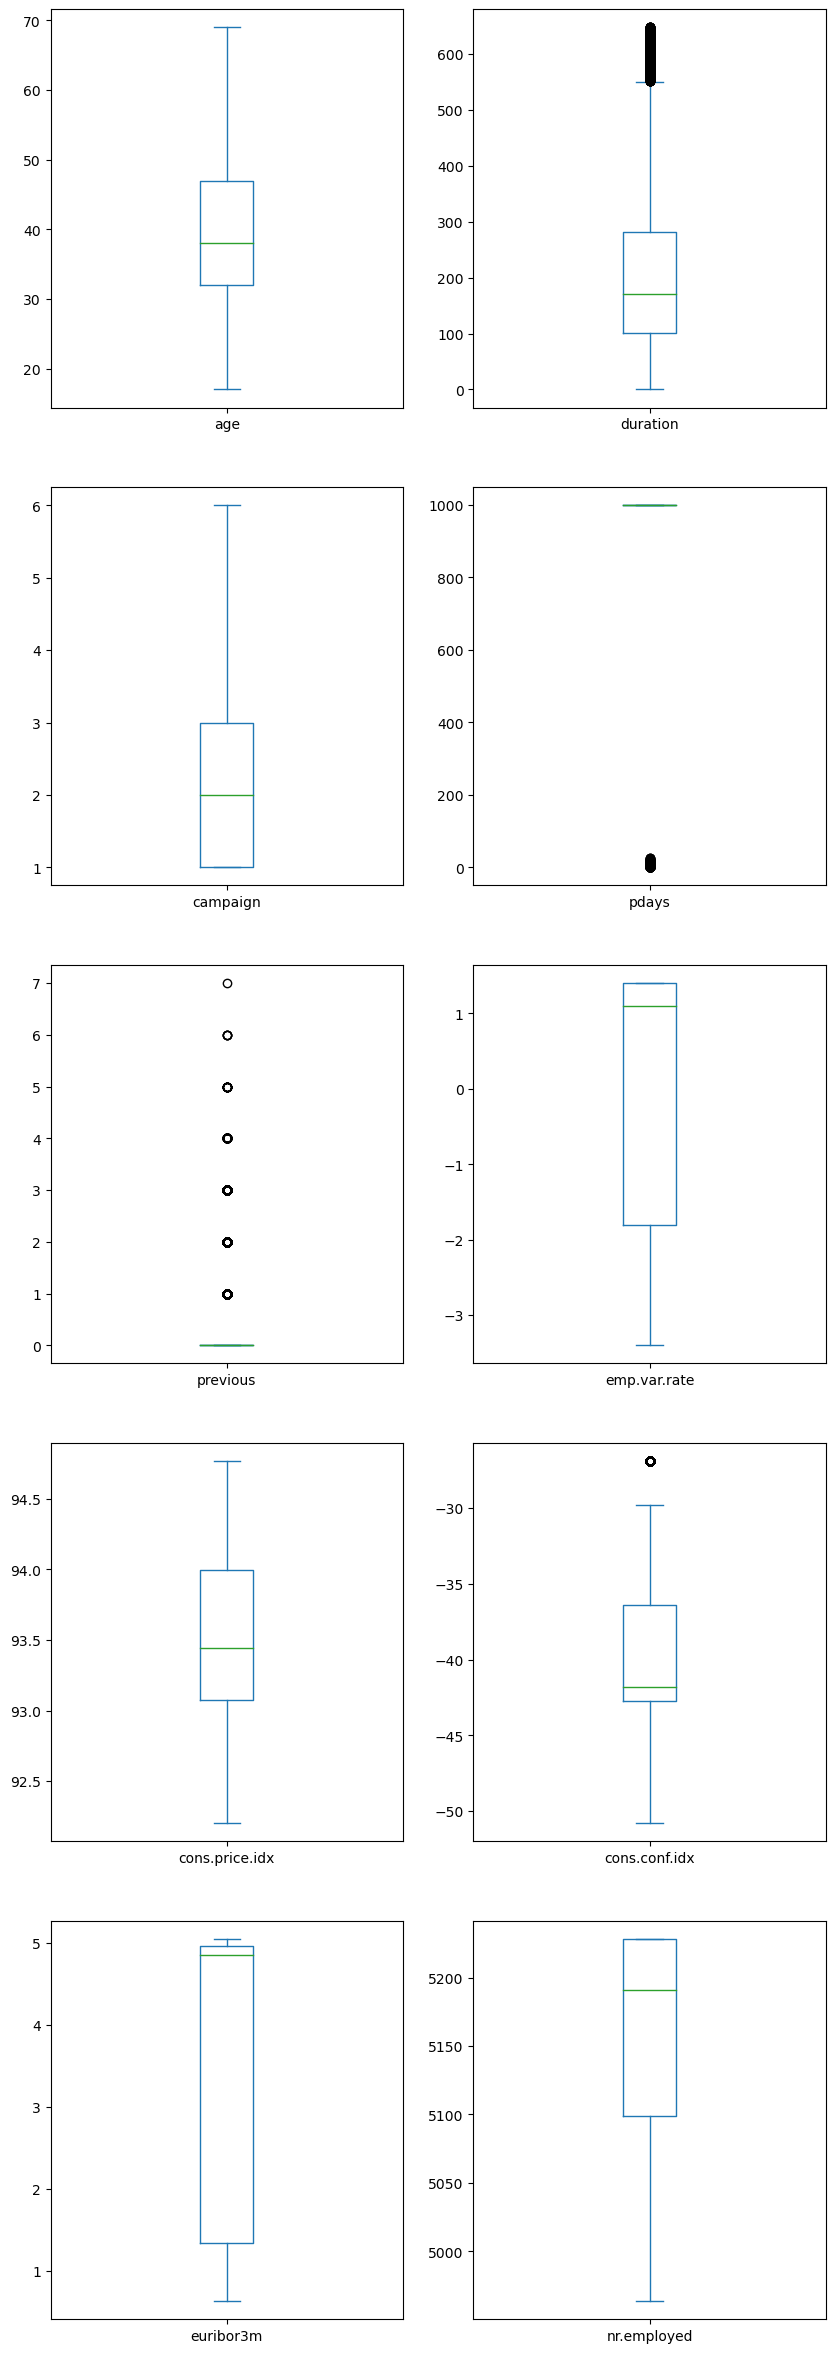

In [13]:
#Handling outliers
columns = ['age', 'campaign', 'duration']

for column in columns:
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
data.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

In [14]:
data_encoded['subscribed_deposit'].value_counts(normalize=True)*100

0    88.733728
1    11.266272
Name: subscribed_deposit, dtype: float64

In [15]:
# Separate the features (independent variables) and the target (dependent variable)
features = data_encoded.iloc[:, :-1]  # Independent variables
target = data_encoded.iloc[:, -1]     # Dependent variable (target)

<h3>Splitting the dataset into train and test datasets <h3>

In [16]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.3,random_state=1)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(28823, 10)
(12353, 10)
(28823,)
(12353,)


<h2>checking for correlation</h2>

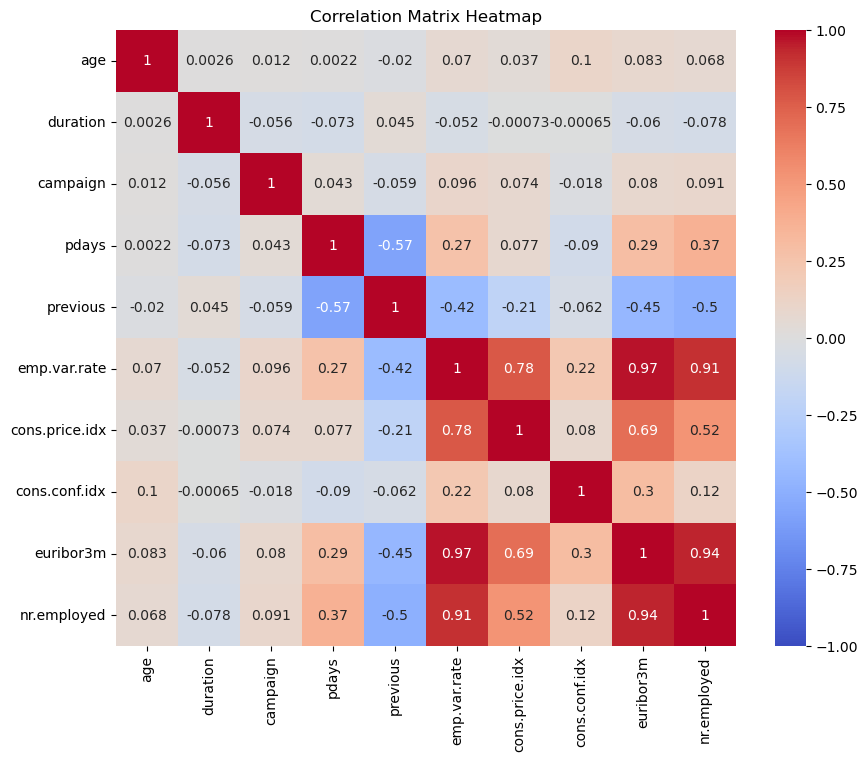

In [17]:
# Select only the numerical columns
numerical_data = data.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [18]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']
data1=data.copy()
# Removing highly correlated columns
data1.drop(high_corr_cols, inplace=True, axis=1)
data1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'subscribed_deposit'],
      dtype='object')

In [19]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(features_train,target_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [20]:
# Training and Testing Accuracy 
print("Training accuracy:",dc.score(features_train,target_train))
print("Testing accuracy:",dc.score(features_test,target_test))

Training accuracy: 0.8980328210109981
Testing accuracy: 0.897433821743706


In [21]:
target_pred=dc.predict(features_test)

In [22]:
#Prediction Accuracy
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(target_test,target_pred))

0.897433821743706


In [23]:
print(confusion_matrix(target_test,target_pred))

[[10808   159]
 [ 1108   278]]


In [24]:
print(classification_report(target_test,target_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10967
           1       0.64      0.20      0.30      1386

    accuracy                           0.90     12353
   macro avg       0.77      0.59      0.62     12353
weighted avg       0.88      0.90      0.87     12353



<h1>Decision Tree</h1>

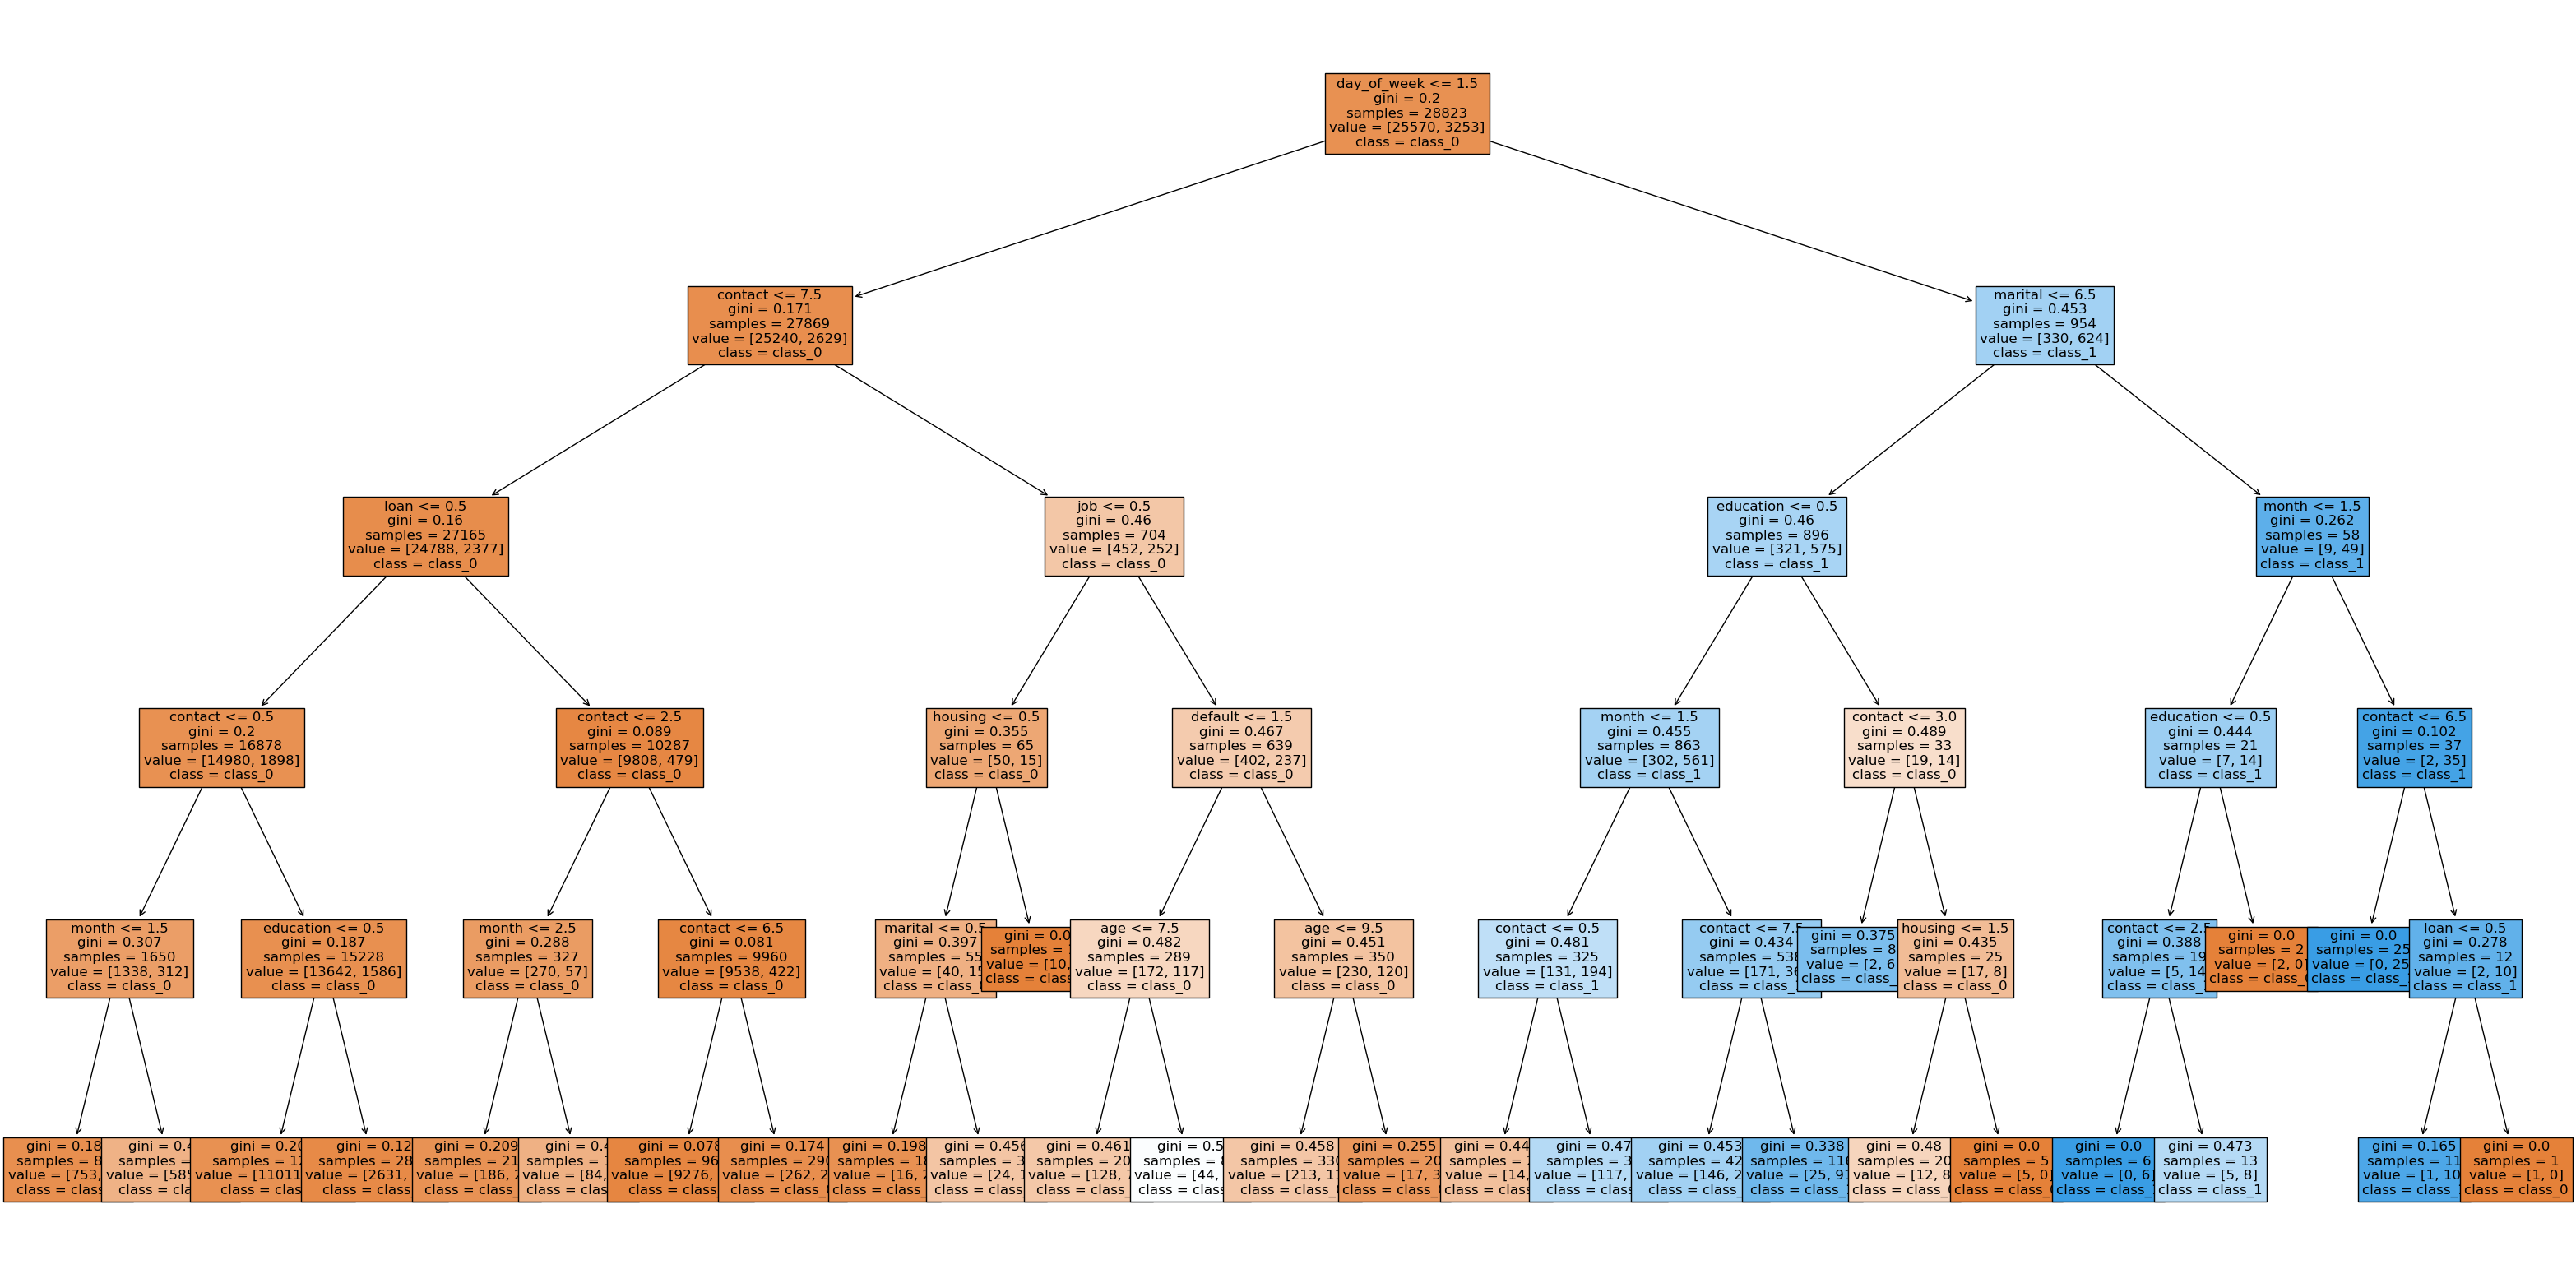

In [25]:
from sklearn.tree import plot_tree
feature_names=data.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()

In [26]:
#Using 'entropy' criterion
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc1.fit(features_train,target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [27]:
# Training and Testing Accuracy
print("Training accuracy:",dc1.score(features_train,target_train))
print("Testing accuracy:",dc1.score(features_test,target_test))

Training accuracy: 0.8983797661589703
Testing accuracy: 0.8972719177527726


In [28]:
target1_pred=dc1.predict(features_test)

In [29]:
print(accuracy_score(target_test,target1_pred))

0.8972719177527726


In [30]:
print(confusion_matrix(target_test,target1_pred))

[[10843   124]
 [ 1145   241]]


In [31]:
print(classification_report(target_test,target1_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10967
           1       0.66      0.17      0.28      1386

    accuracy                           0.90     12353
   macro avg       0.78      0.58      0.61     12353
weighted avg       0.88      0.90      0.87     12353



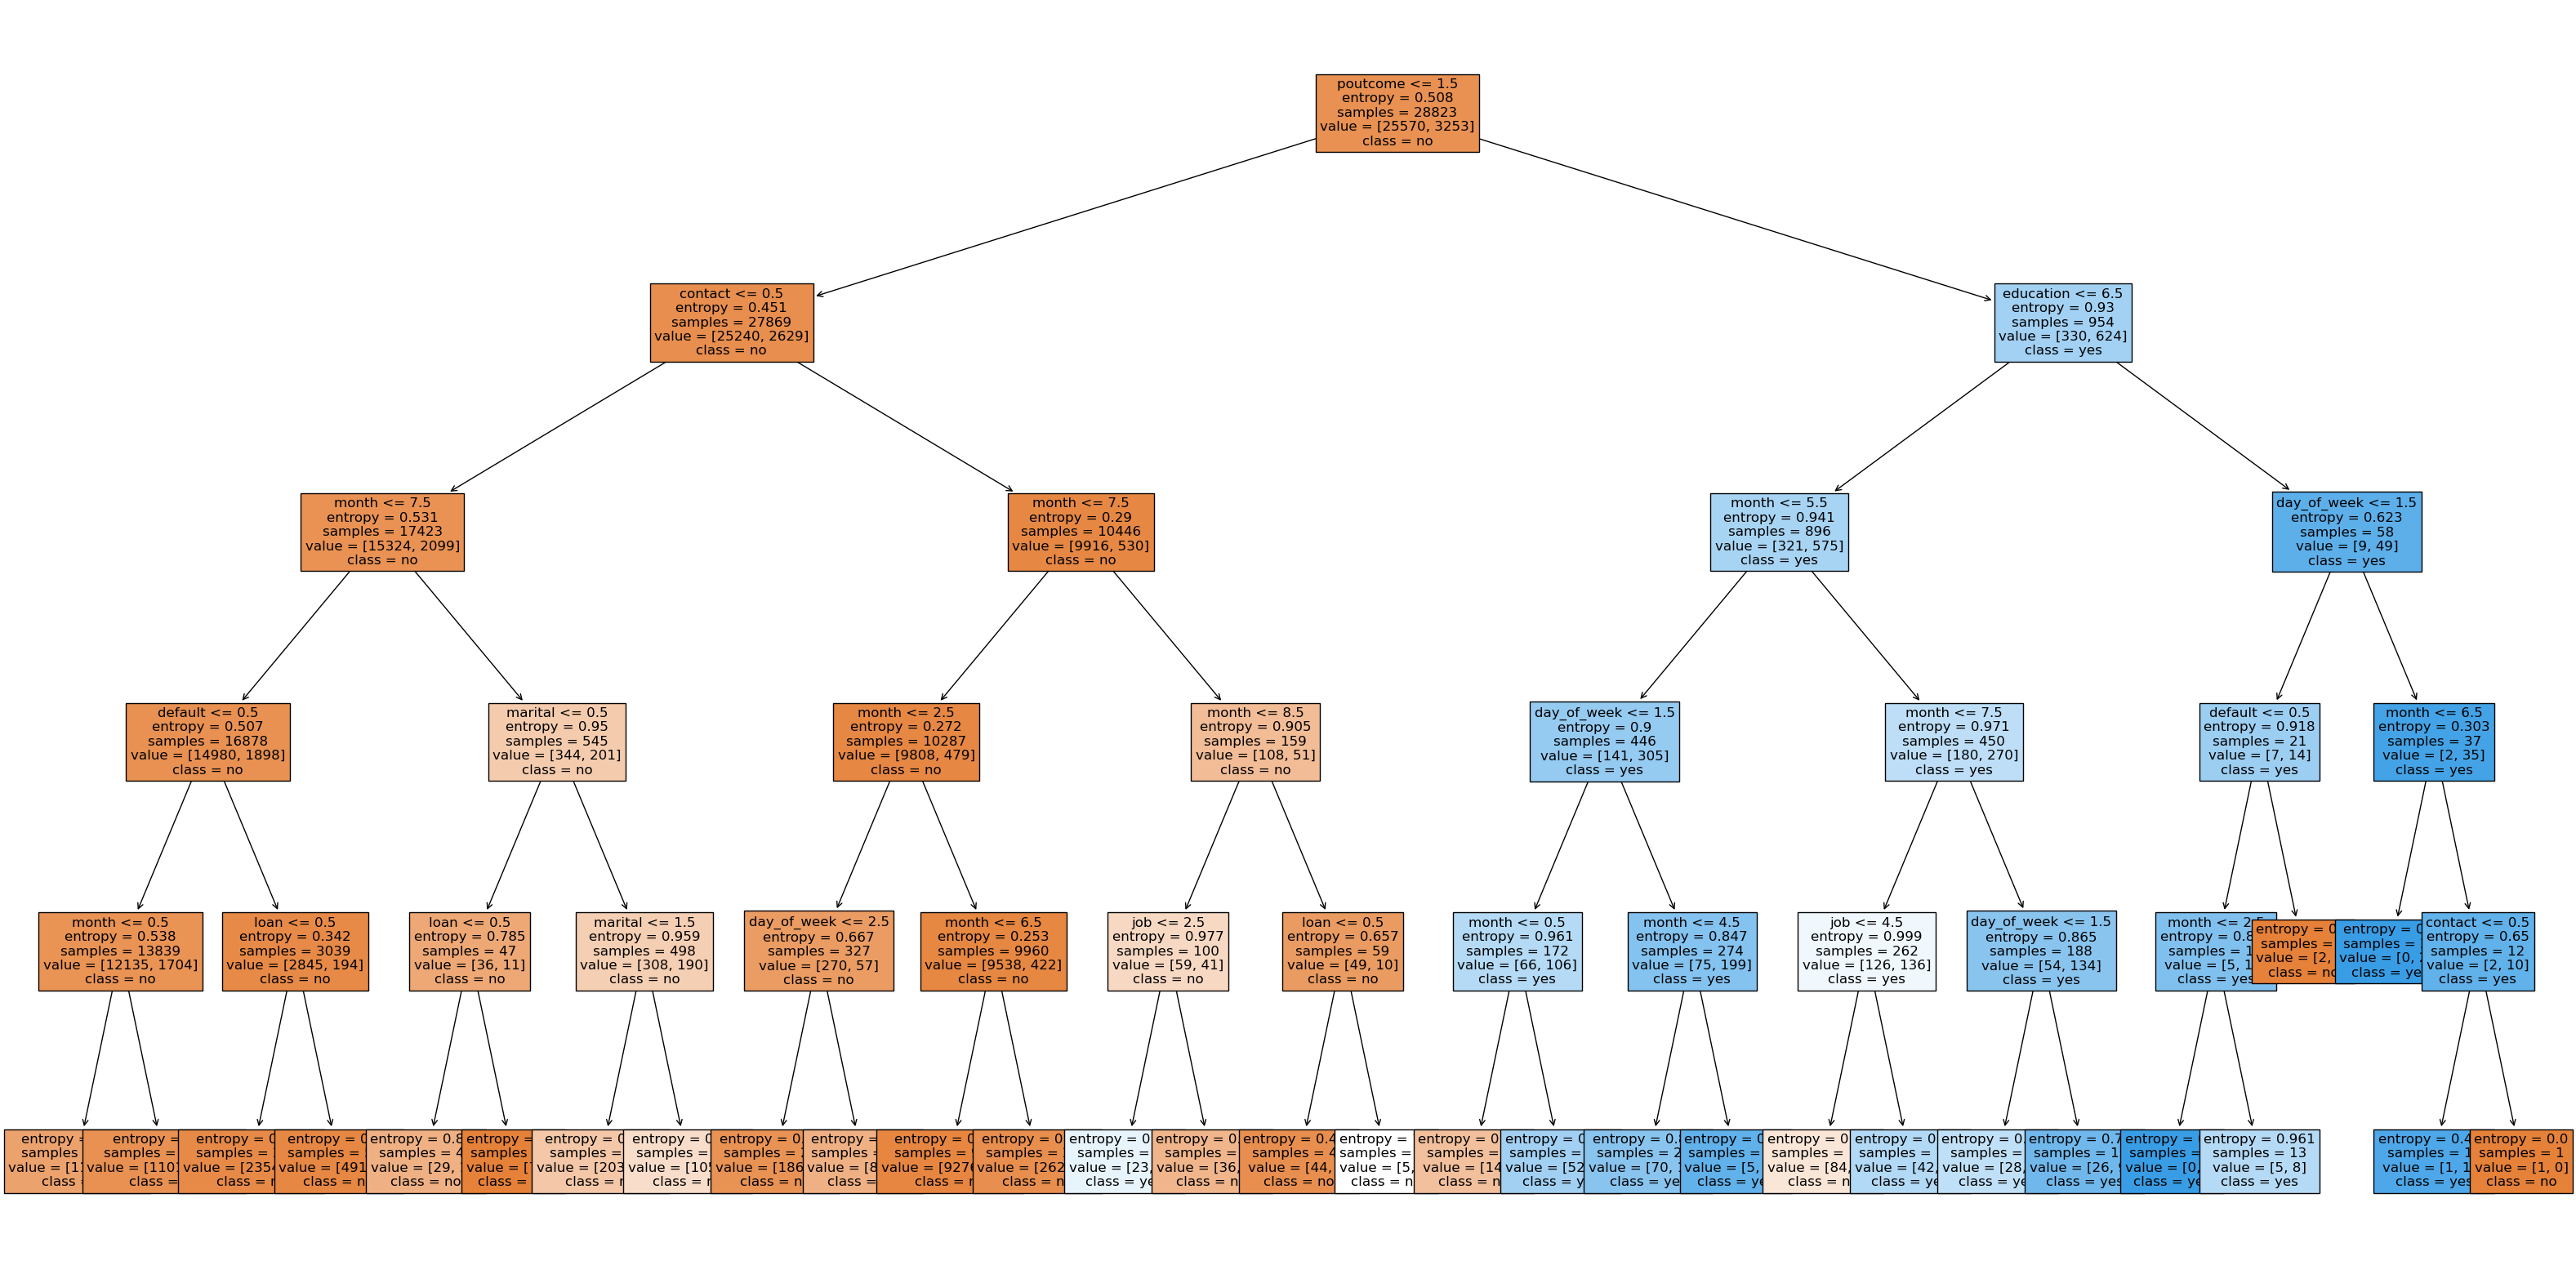

In [32]:
cn=['no','yes']
fn=features_train.columns
plt.figure(figsize=(40,20))
plot_tree(dc1, feature_names=fn.tolist(), class_names=cn, filled=True,fontsize=12)
plt.show()